___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans, AgglomerativeClustering

%matplotlib inline

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HR_Dataset.csv")

In [5]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years Departments   salary
0                0.38             0.53               2                   157                   3              0     1                      0        sales     low
1                0.80             0.86               5                   262                   6              0     1                      0        sales  medium
2                0.11             0.88               7                   272                   4              0     1                      0        sales  medium
3                0.72             0.87               5                   223                   5              0     1                      0        sales     low
4                0.37             0.52               2                   159                   3              0     1                      0        sales     low

In [6]:
df.tail()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years Departments  salary
14994                0.40             0.57               2                   151                   3              0     1                      0      support    low
14995                0.37             0.48               2                   160                   3              0     1                      0      support    low
14996                0.37             0.53               2                   143                   3              0     1                      0      support    low
14997                0.11             0.96               6                   280                   4              0     1                      0      support    low
14998                0.37             0.52               2                   158                   3              0     1                      0      support    low

## 1. Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.shape

(14999, 10)

In [9]:
df.isnull().sum().any() # No missing values

False

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe().T  # summary statistics
# seems we have no outliers

count        mean        std    min     25%     50%     75%    max
satisfaction_level     11991.0    0.629658   0.241070   0.09    0.48    0.66    0.82    1.0
last_evaluation        11991.0    0.716683   0.168343   0.36    0.57    0.72    0.86    1.0
number_project         11991.0    3.802852   1.163238   2.00    3.00    4.00    5.00    7.0
average_montly_hours   11991.0  200.473522  48.727813  96.00  157.00  200.00  243.00  310.0
time_spend_company     11991.0    3.364857   1.330240   2.00    3.00    3.00    4.00   10.0
Work_accident          11991.0    0.154282   0.361234   0.00    0.00    0.00    0.00    1.0
left                   11991.0    0.166041   0.372133   0.00    0.00    0.00    0.00    1.0
promotion_last_5years  11991.0    0.016929   0.129012   0.00    0.00    0.00    0.00    1.0

In [13]:
# dpartments have a space at the end
df.rename(columns={'Departments ': 'Departments'}, inplace=True)

In [14]:
df.left.value_counts()

# imbalanced data

0    10000
1     1991
Name: left, dtype: int64

## 2. Data Visualization

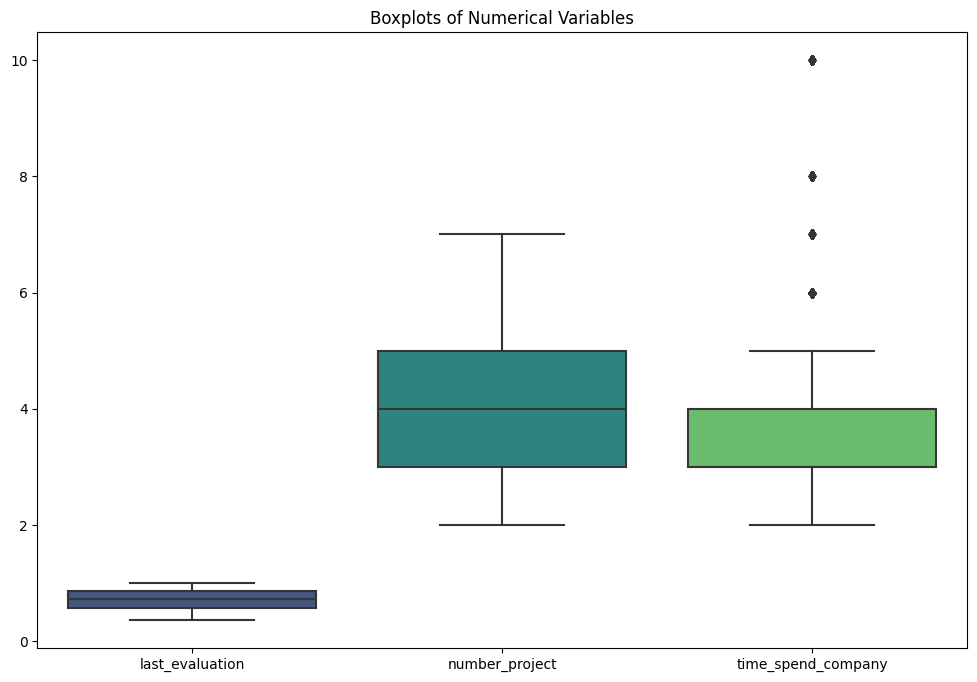

In [15]:
numerical_columns = ['last_evaluation', 'number_project', 'time_spend_company']

# looking if we have outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], palette='viridis')
plt.title('Boxplots of Numerical Variables')
plt.show()

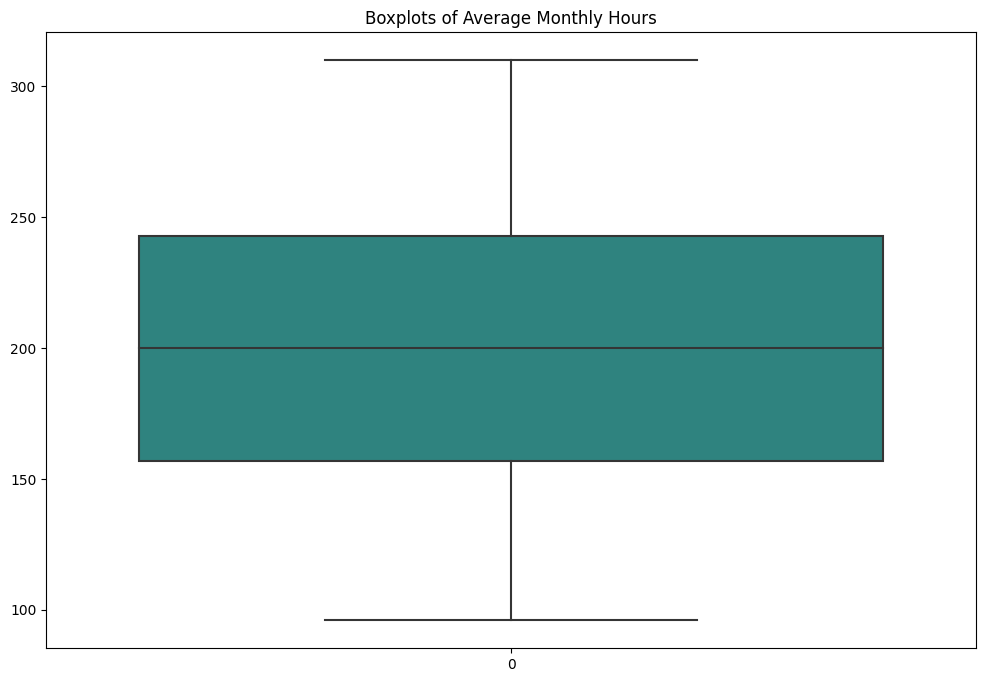

In [16]:
# looking if we have outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df["average_montly_hours"], palette='viridis')
plt.title('Boxplots of Average Monthly Hours')
plt.show()

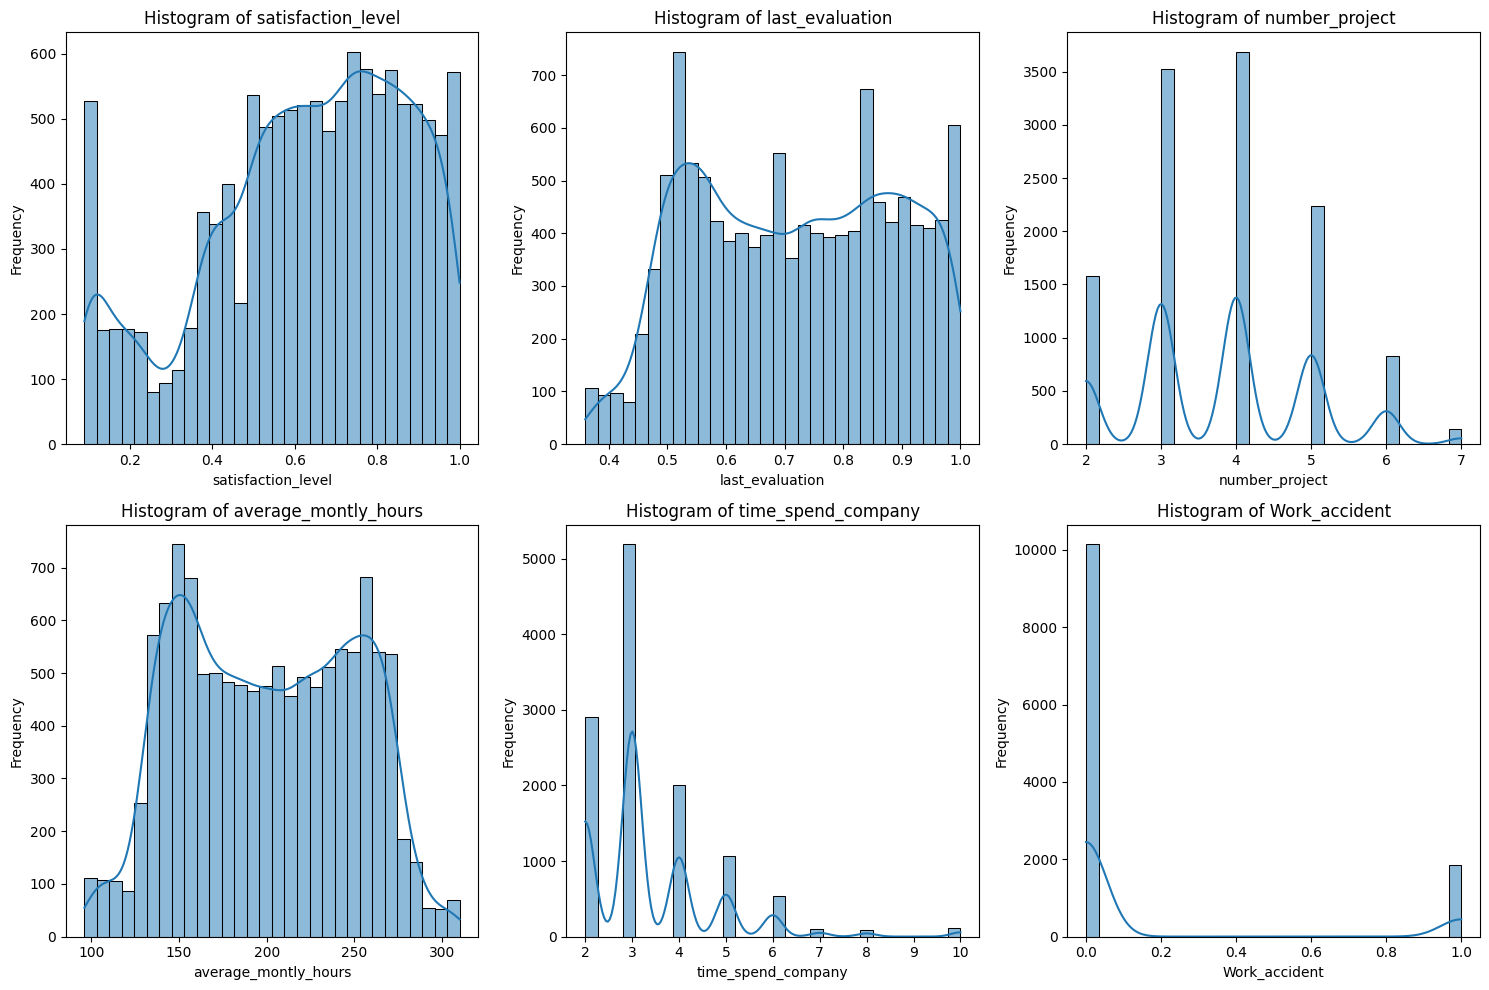

In [17]:
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','Work_accident']

# Create subplots for numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram of {column}')
    axes[i//3, i%3].set_xlabel(column)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


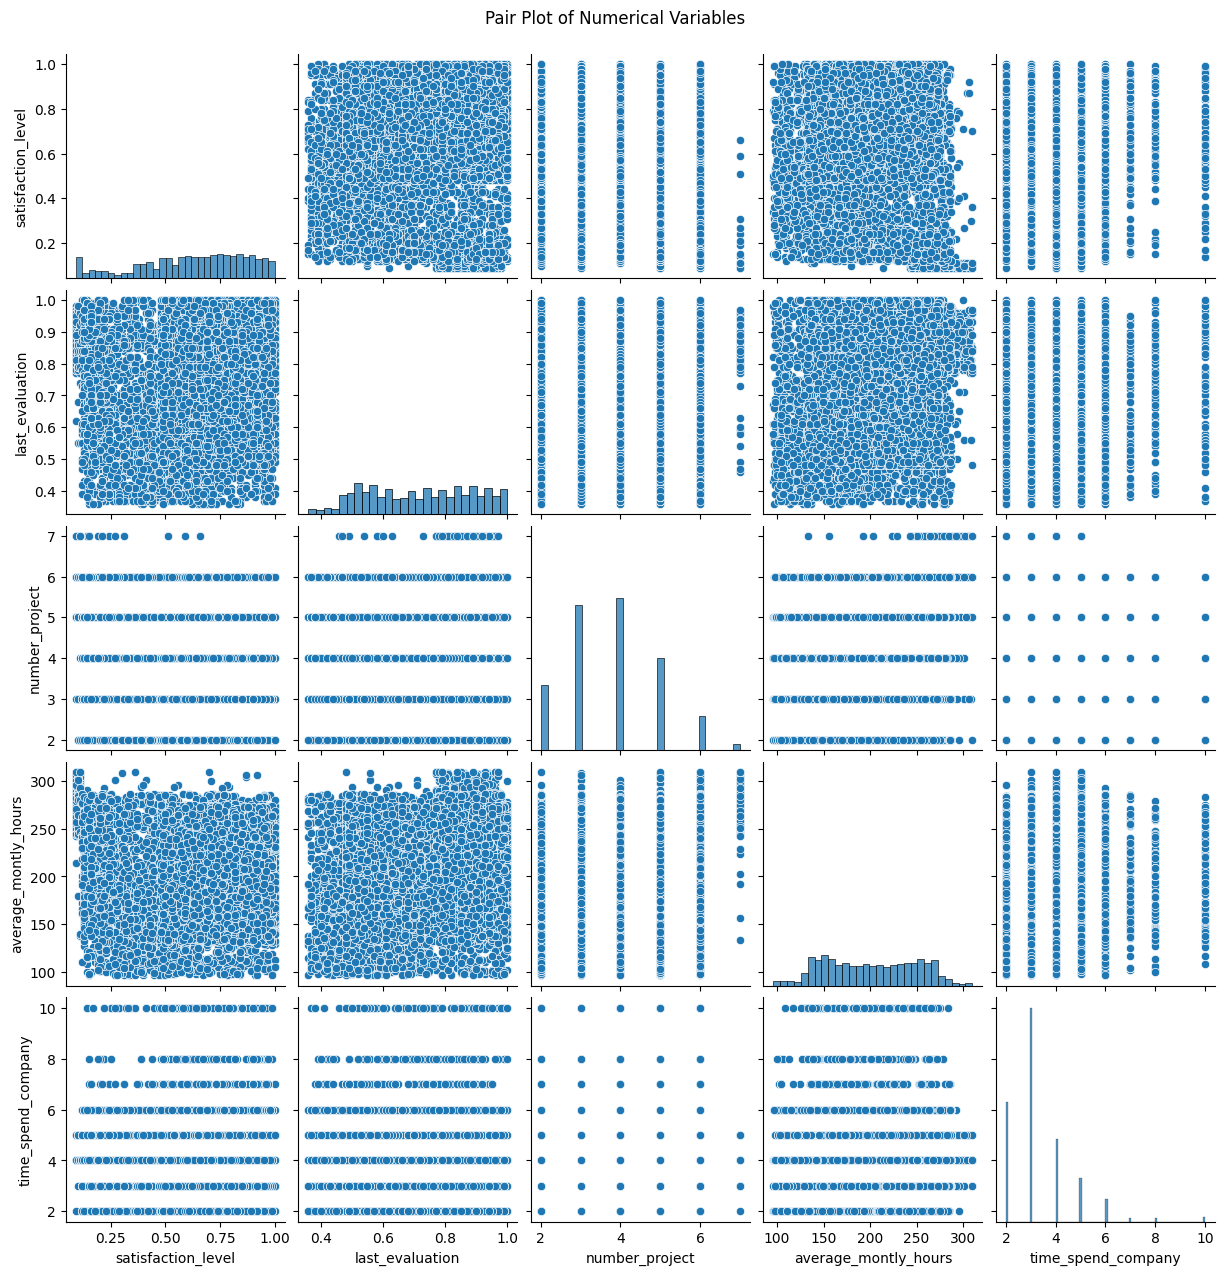

In [18]:
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Create pair plots for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


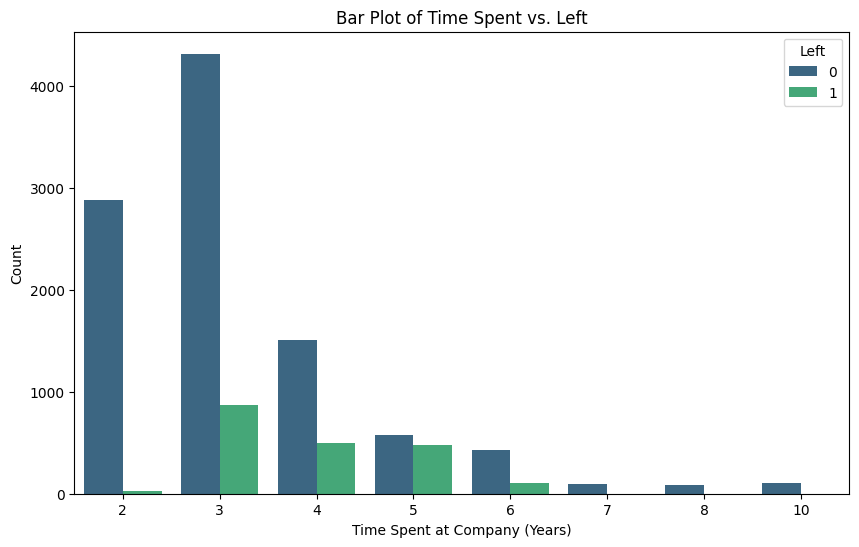

In [19]:
# The Relationship between left and time spent in company
plt.figure(figsize=(10, 6))
sns.countplot(x='time_spend_company', hue='left', data=df, palette='viridis')
plt.title('Bar Plot of Time Spent vs. Left')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()
# people who spent 5 years have high propability to leave

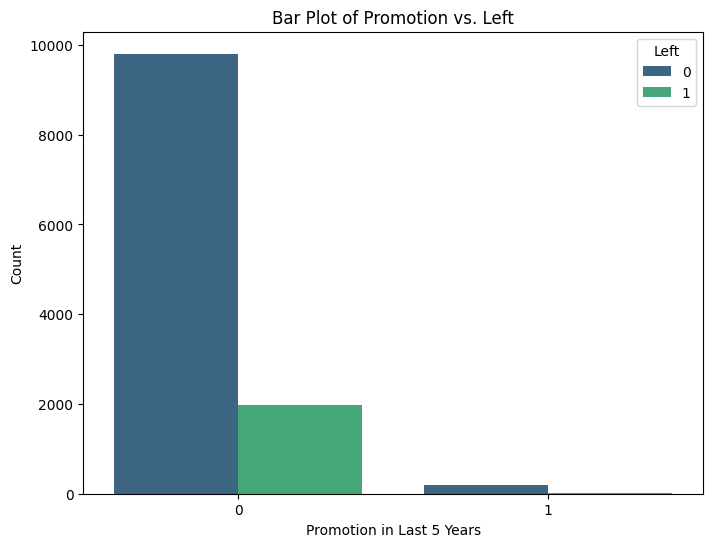

In [20]:
# The Relationship between left and promotion in last 5 years

plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_last_5years', hue='left', data=df, palette='viridis')
plt.title('Bar Plot of Promotion vs. Left')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()

# people who do not get any promotion will think about leaving

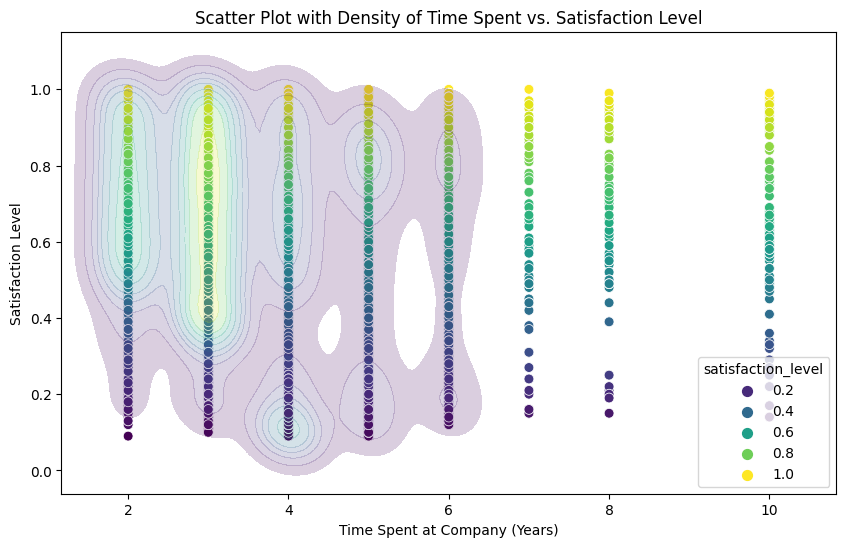

In [21]:
# seeing if the employee are happy whaile they are spending time in our company or not
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_spend_company', y='satisfaction_level', data=df, hue='satisfaction_level', palette='viridis', size='satisfaction_level', sizes=(50, 50))

# Add a density plot on the sides
sns.kdeplot(x='time_spend_company', y='satisfaction_level', data=df, cmap='viridis', fill=True, alpha=0.2)

plt.title('Scatter Plot with Density of Time Spent vs. Satisfaction Level')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Satisfaction Level')
plt.show()
# in the first 3 years people are most likely to be satisfied

<Figure size 1000x600 with 0 Axes>

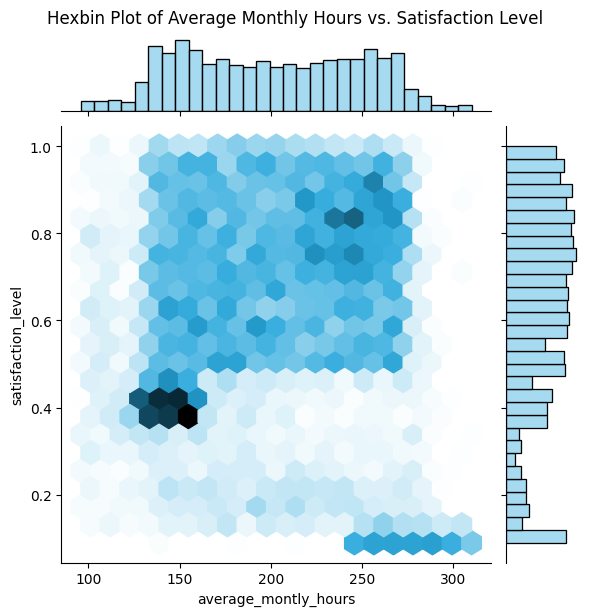

In [22]:
# see the relation between average_montly_hours and satisfaction_level
plt.figure(figsize=(10, 6))
sns.jointplot(x='average_montly_hours', y='satisfaction_level', data=df, kind='hex', color='skyblue', gridsize=20)
plt.suptitle('Hexbin Plot of Average Monthly Hours vs. Satisfaction Level', y=1.02)
plt.show()
# people with hours between 130-150 are most likelt to have 0.4 satisfaction level
# people who work between 150-270 most likely to have 0.5 and above satisfaction level
# people who wrok between 250-300 are not happy

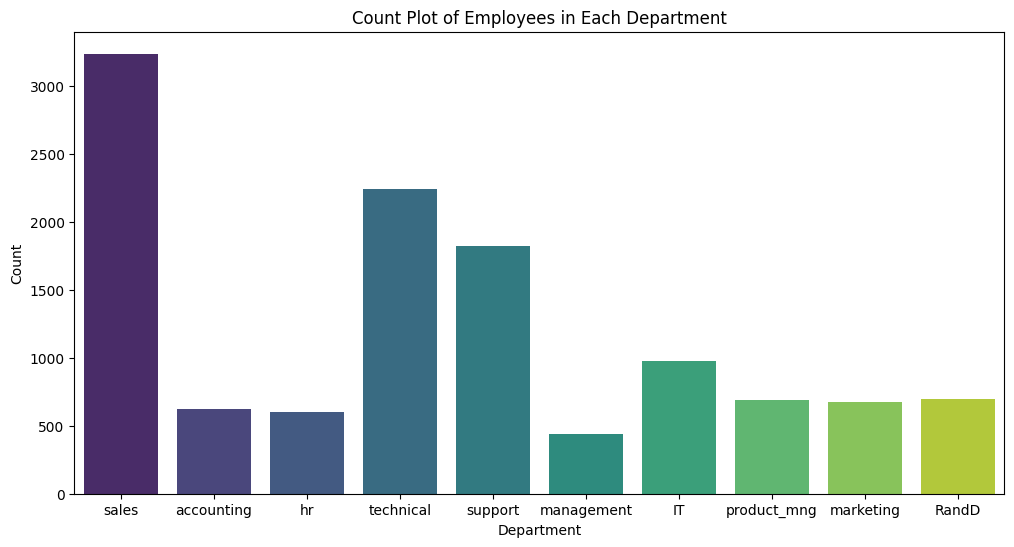

In [23]:
# counting employees from each department
plt.figure(figsize=(12, 6))
sns.countplot(x='Departments', data=df, palette='viridis')
plt.title('Count Plot of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()
# sales department have the most Number of employees

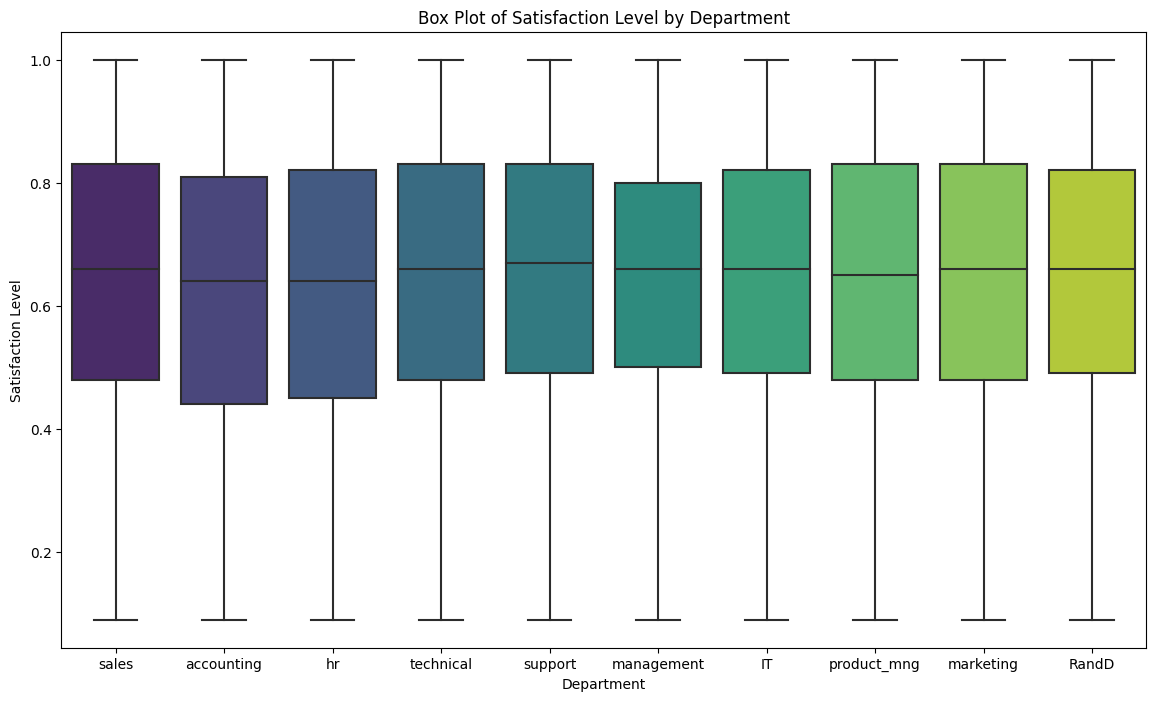

In [24]:
# satisfaction level by department
plt.figure(figsize=(14, 8))
sns.boxplot(x='Departments', y='satisfaction_level', data=df, palette='viridis')
plt.title('Box Plot of Satisfaction Level by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.show()

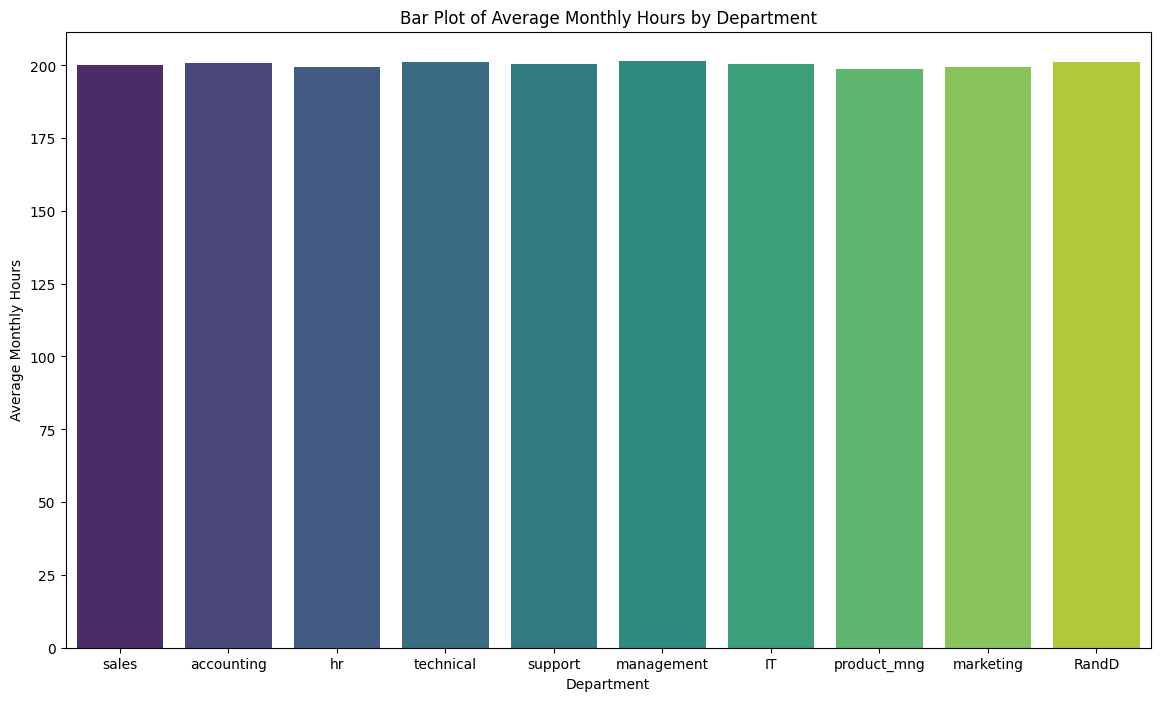

In [25]:
# Average Monthly hours by department
plt.figure(figsize=(14, 8))
sns.barplot(x='Departments', y='average_montly_hours', data=df, palette='viridis', ci=None)
plt.title('Bar Plot of Average Monthly Hours by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.show()
# almost the same average for each department

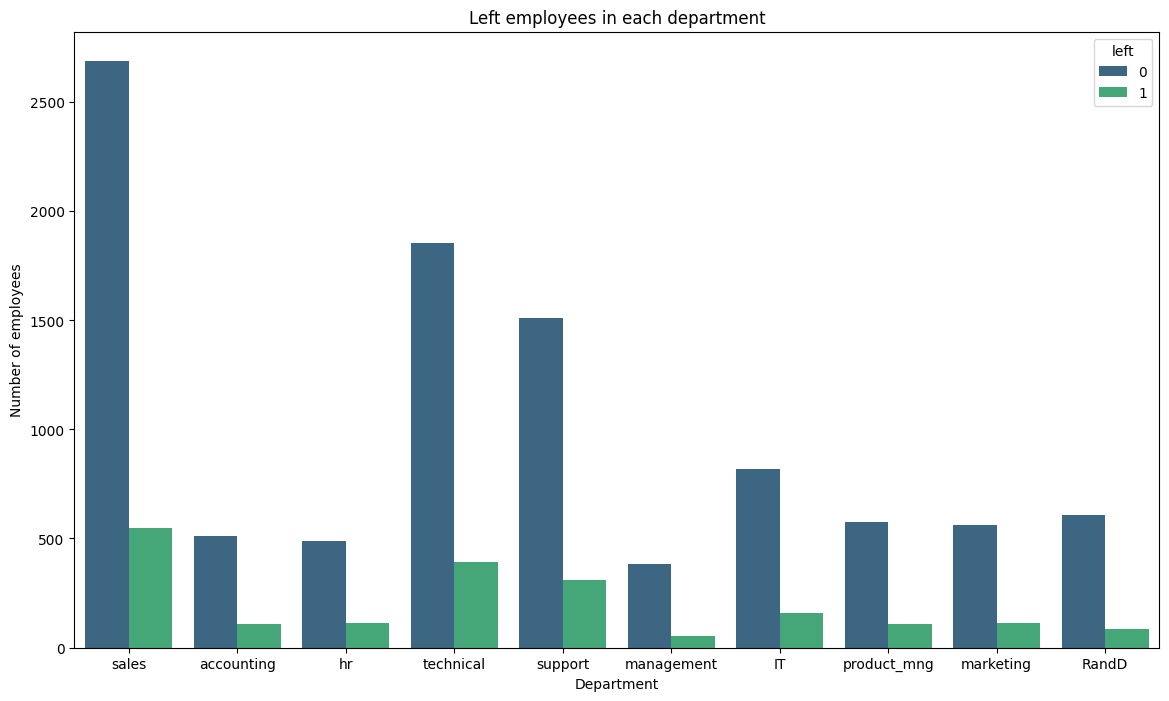

In [26]:
# Left employees in each department
plt.figure(figsize=(14, 8))
sns.countplot(x='Departments', hue="left", data=df, palette='viridis')
plt.title('Left employees in each department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.show()


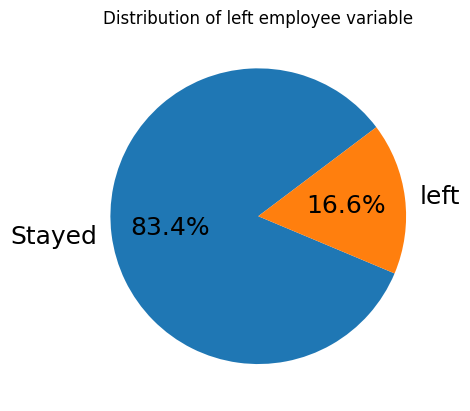

In [27]:
df.left.value_counts().plot.pie(autopct='%1.1f%%',
                                  startangle=37,
                                  fontsize=18,
                                  labels=["Stayed","left"],
                                  ylabel='',
                                  title='Distribution of left employee variable');

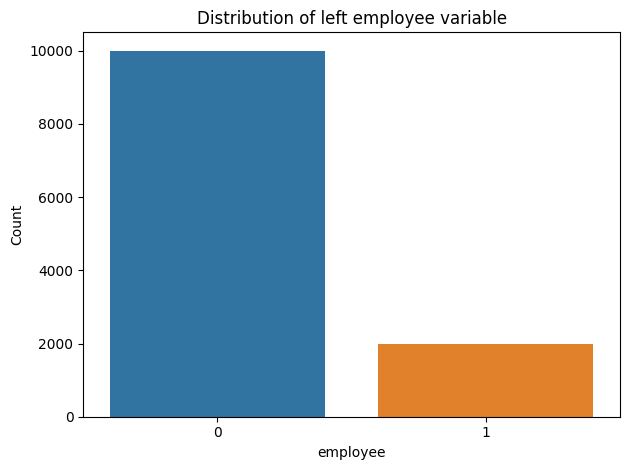

In [28]:
ax = sns.countplot(x='left', data=df)
plt.title('Distribution of left employee variable')
plt.xlabel('employee')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

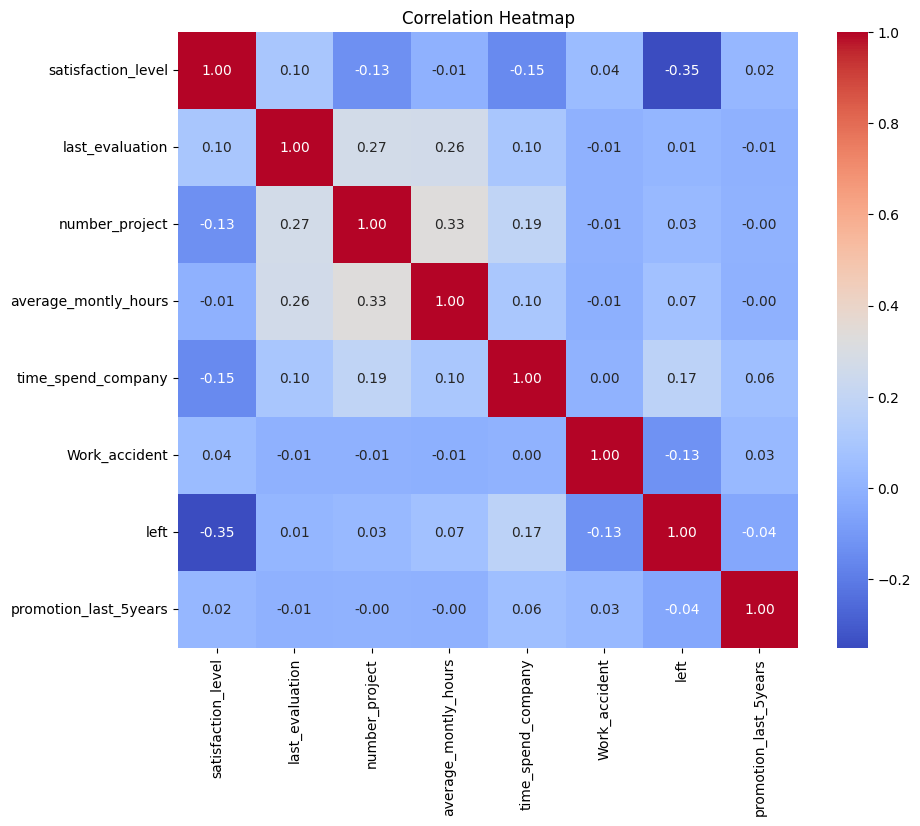

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# no high correlations

## 4. Cluster Analysis

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode 'Departments' column
df['Departments'] = label_encoder.fit_transform(df['Departments'])

# Encode 'salary' column
df['salary'] = label_encoder.fit_transform(df['salary'])

In [31]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years  Departments  salary
0                0.38             0.53               2                   157                   3              0     1                      0            7       1
1                0.80             0.86               5                   262                   6              0     1                      0            7       2
2                0.11             0.88               7                   272                   4              0     1                      0            7       2
3                0.72             0.87               5                   223                   5              0     1                      0            7       1
4                0.37             0.52               2                   159                   3              0     1                      0            7       1

In [32]:
df_cluster = df.drop('left', axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer

# Create different scalers to see how will the effect the results of hopkins
scaler_mm = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
scaler_power = PowerTransformer()
scaler_quantile = QuantileTransformer(output_distribution='uniform')

# Apply MinMaxScaler
df_cluster_mm = scaler_mm.fit_transform(df_cluster)

# Apply StandardScaler
df_cluster_st = scaler_standard.fit_transform(df_cluster)

# Apply RobustScaler
df_cluster_rb = scaler_robust.fit_transform(df_cluster)

# Apply PowerTransformer
df_cluster_po = scaler_power.fit_transform(df_cluster)

# Apply QuantileTransformer
df_cluster_qu = scaler_quantile.fit_transform(df_cluster)

In [34]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [35]:
hopkins(df_cluster_st, 1)
#MinMax scaler =            0.8139107688661029
#StandardScaler =           0.8404647516802438
#RobustScaler =             0.762716627355265
#PowerTransformer scaler =  0.831543331573574
#QuantileTransformer =      0.7836944114803537

# standard scaler is giving the highest result

0.840388915729249

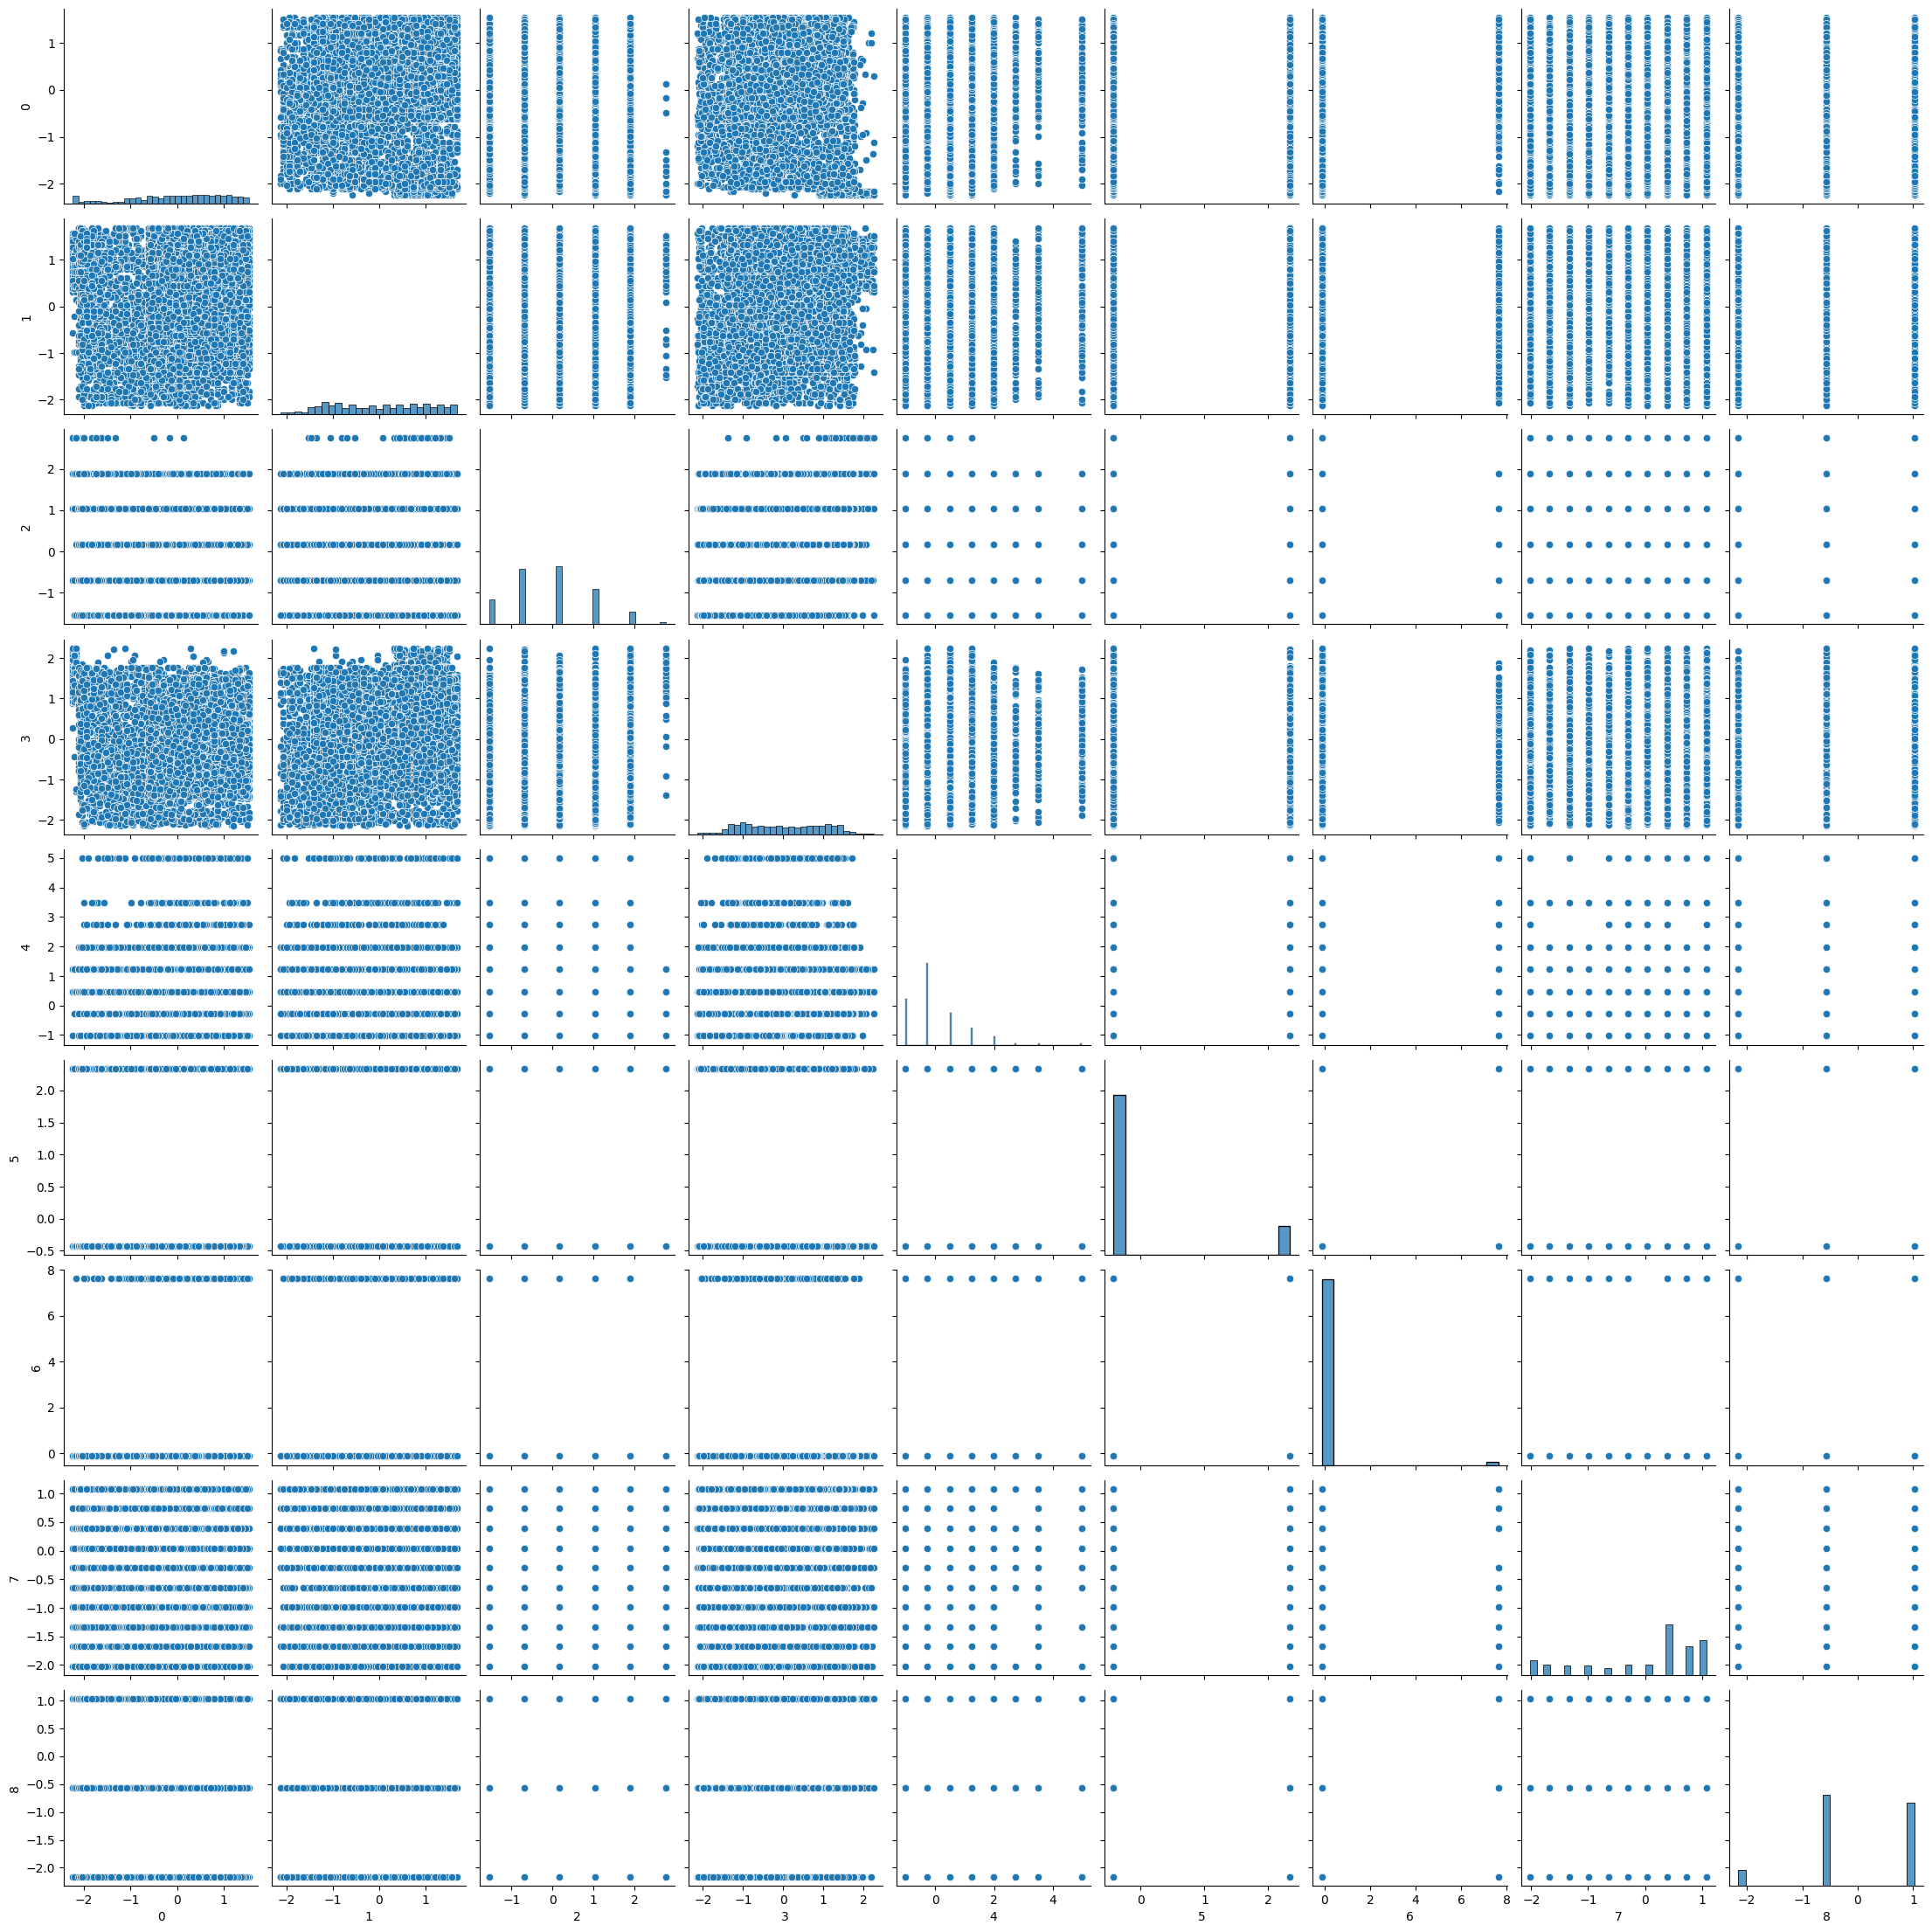

In [36]:
df_cluster_st = pd.DataFrame(df_cluster_st)
sns.pairplot(df_cluster_st)
plt.show()

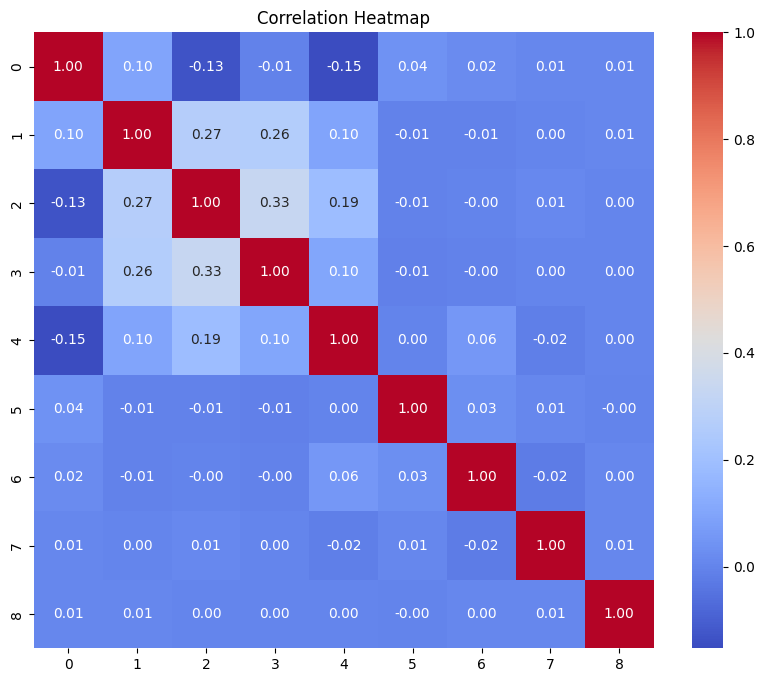

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cluster_st.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
from sklearn.cluster import KMeans

ssd = []

K = range(1,7)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_cluster_st)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

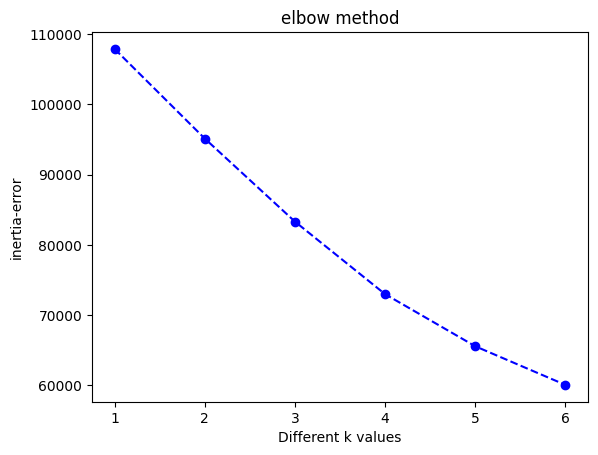

In [39]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
# not very clear but maybe 4

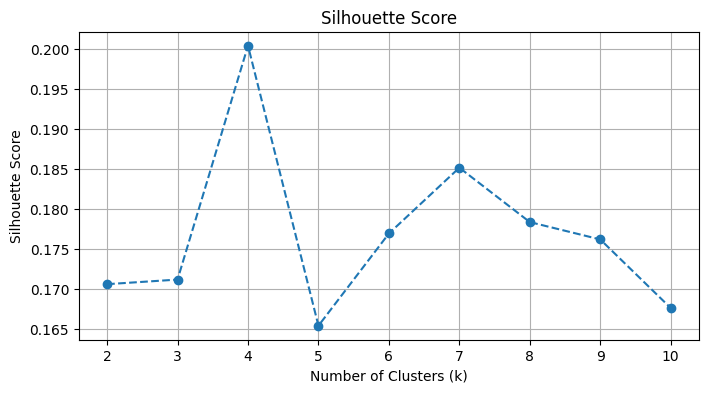

In [40]:
# Calculate the Silhouette score for a range of cluster numbers
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Considering cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_st)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_cluster_st, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# 4 have the highest score so we will go with it

In [41]:
# Set the number of clusters to 4
num_clusters = 4

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_cluster_st)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [42]:
df_cluster_st["labels"] = kmeans.fit_predict(df_cluster_st)

In [43]:
df_cluster_st.tail()

0         1         2         3         4         5         6         7         8  labels
11986  1.121472 -0.990180 -0.690216  1.201140  4.988139  2.341286  7.620300 -0.645470 -2.159373       3
11987  0.457736  1.386026  1.029194  1.344801  4.988139 -0.427116  7.620300 -0.645470 -2.159373       3
11988  0.914054 -1.049585 -0.690216 -0.317563  4.988139 -0.427116  7.620300 -0.645470 -2.159373       3
11989 -1.243085 -0.396129 -0.690216 -0.584363  4.988139 -0.427116  7.620300 -0.300512 -2.159373       3
11990 -0.537867  0.079113  0.169489 -0.420178 -0.274291 -0.427116 -0.131228 -2.025303 -0.567131       2

In [44]:
label_mapping = {
    0: 'left',
    1: 'May Leave',
    2: 'May stay',
    3: 'Stayed'}

# Applying the mapping to create a new column 'Cluster_Labels'
df_cluster_st['Kmeans_Label'] = df_cluster_st['labels'].map(label_mapping)
df_cluster_st

0         1         2         3         4         5         6         7         8  labels Kmeans_Label
0     -1.035668 -1.108990 -1.549921 -0.892208 -0.274291 -0.427116 -0.131228  0.389405 -0.567131       2     May stay
1      0.706637  0.851380  1.029194  1.262709  1.981036 -0.427116 -0.131228  0.389405  1.025111       1    May Leave
2     -2.155721  0.970190  2.748604  1.467939  0.477485 -0.427116 -0.131228  0.389405  1.025111       1    May Leave
3      0.374770  0.910785  1.029194  0.462311  1.229261 -0.427116 -0.131228  0.389405 -0.567131       1    May Leave
4     -1.077151 -1.168396 -1.549921 -0.851162 -0.274291 -0.427116 -0.131228  0.389405 -0.567131       2     May stay
...         ...       ...       ...       ...       ...       ...       ...       ...       ...     ...          ...
11986  1.121472 -0.990180 -0.690216  1.201140  4.988139  2.341286  7.620300 -0.645470 -2.159373       3       Stayed
11987  0.457736  1.386026  1.029194  1.344801  4.988139 -0.427116  7.620300 -0.645470 -2.159373       3       Stayed
11988  0.914054 -1.049585 -0.690216 -0.317563  4.988139 -0.427116  7.620300 -0.645470 -2.159373       3       Stayed
11989 -1.243085 -0.396129 -0.690216 -0.584363  4.988139 -0.427116  7.620300 -0.300512 -2.159373       3       Stayed
11990 -0.537867  0.079113  0.169489 -0.420178 -0.274291 -0.427116 -0.131228 -2.025303 -0.567131       2     May stay

[11991 rows x 11 columns]

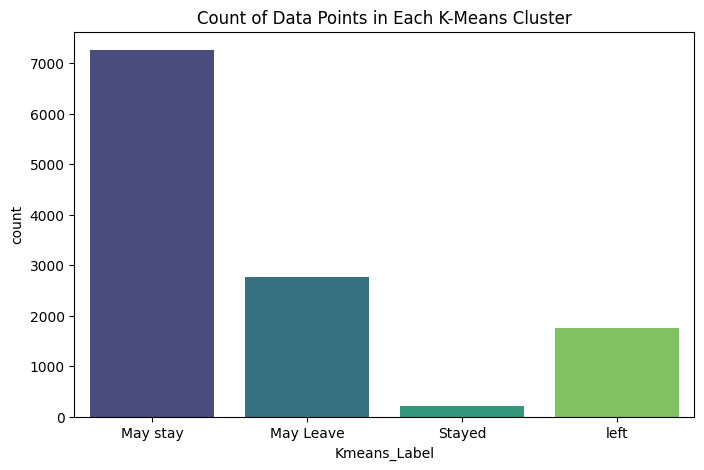

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Kmeans_Label', data=df_cluster_st, palette='viridis')
plt.title('Count of Data Points in Each K-Means Cluster')
plt.show()

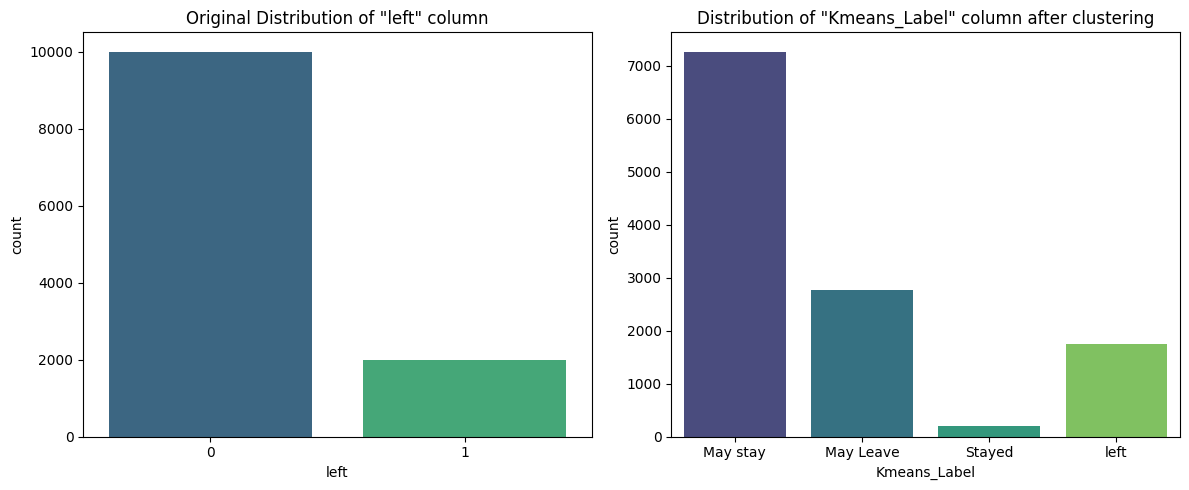

In [46]:
# Plot the distribution of the 'left' column in the original DataFrame
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='left', data=df, palette='viridis')
plt.title('Original Distribution of "left" column')

# Plot the distribution of the 'Kmeans_Label' column after clustering
plt.subplot(1, 2, 2)
sns.countplot(x='Kmeans_Label', data=df_cluster_st, palette='viridis')
plt.title('Distribution of "Kmeans_Label" column after clustering')

plt.tight_layout()
plt.show()

In [47]:
# Merge the two DataFrames on their index
merged_df = pd.merge(df, df_cluster_st[['Kmeans_Label']], left_index=True, right_index=True)

# Display the merged DataFrame
merged_df[['left', 'Kmeans_Label']].sample(15)

left Kmeans_Label
5433      0    May Leave
3804      0     May stay
3980      0    May Leave
284       1     May stay
6196      0    May Leave
2954      0     May stay
3729      0     May stay
896       1    May Leave
10413     0         left
3836      0     May stay
4219      0         left
10880     0         left
6990      0     May stay
11288     0    May Leave
7919      0     May stay

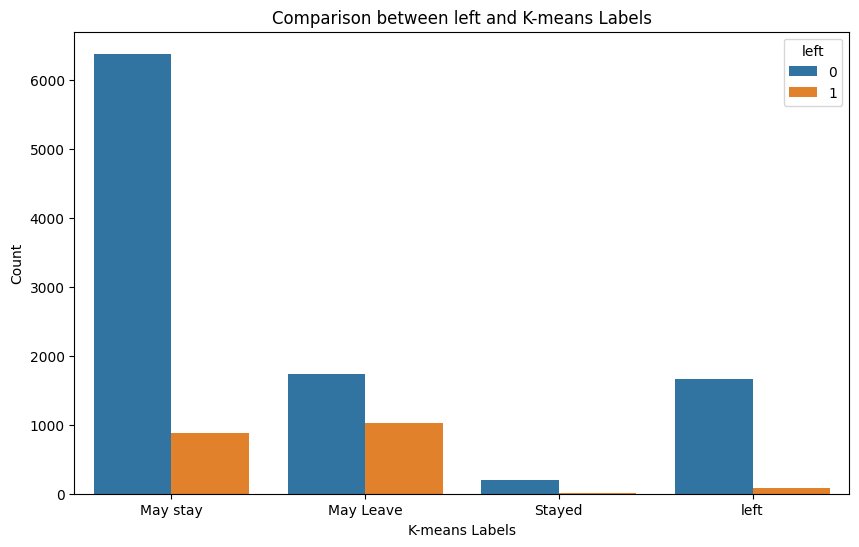

In [48]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Kmeans_Label', hue='left', data=merged_df)
plt.xlabel('K-means Labels')
plt.ylabel('Count')
plt.title('Comparison between left and K-means Labels')
plt.show()

<Figure size 1500x1500 with 0 Axes>

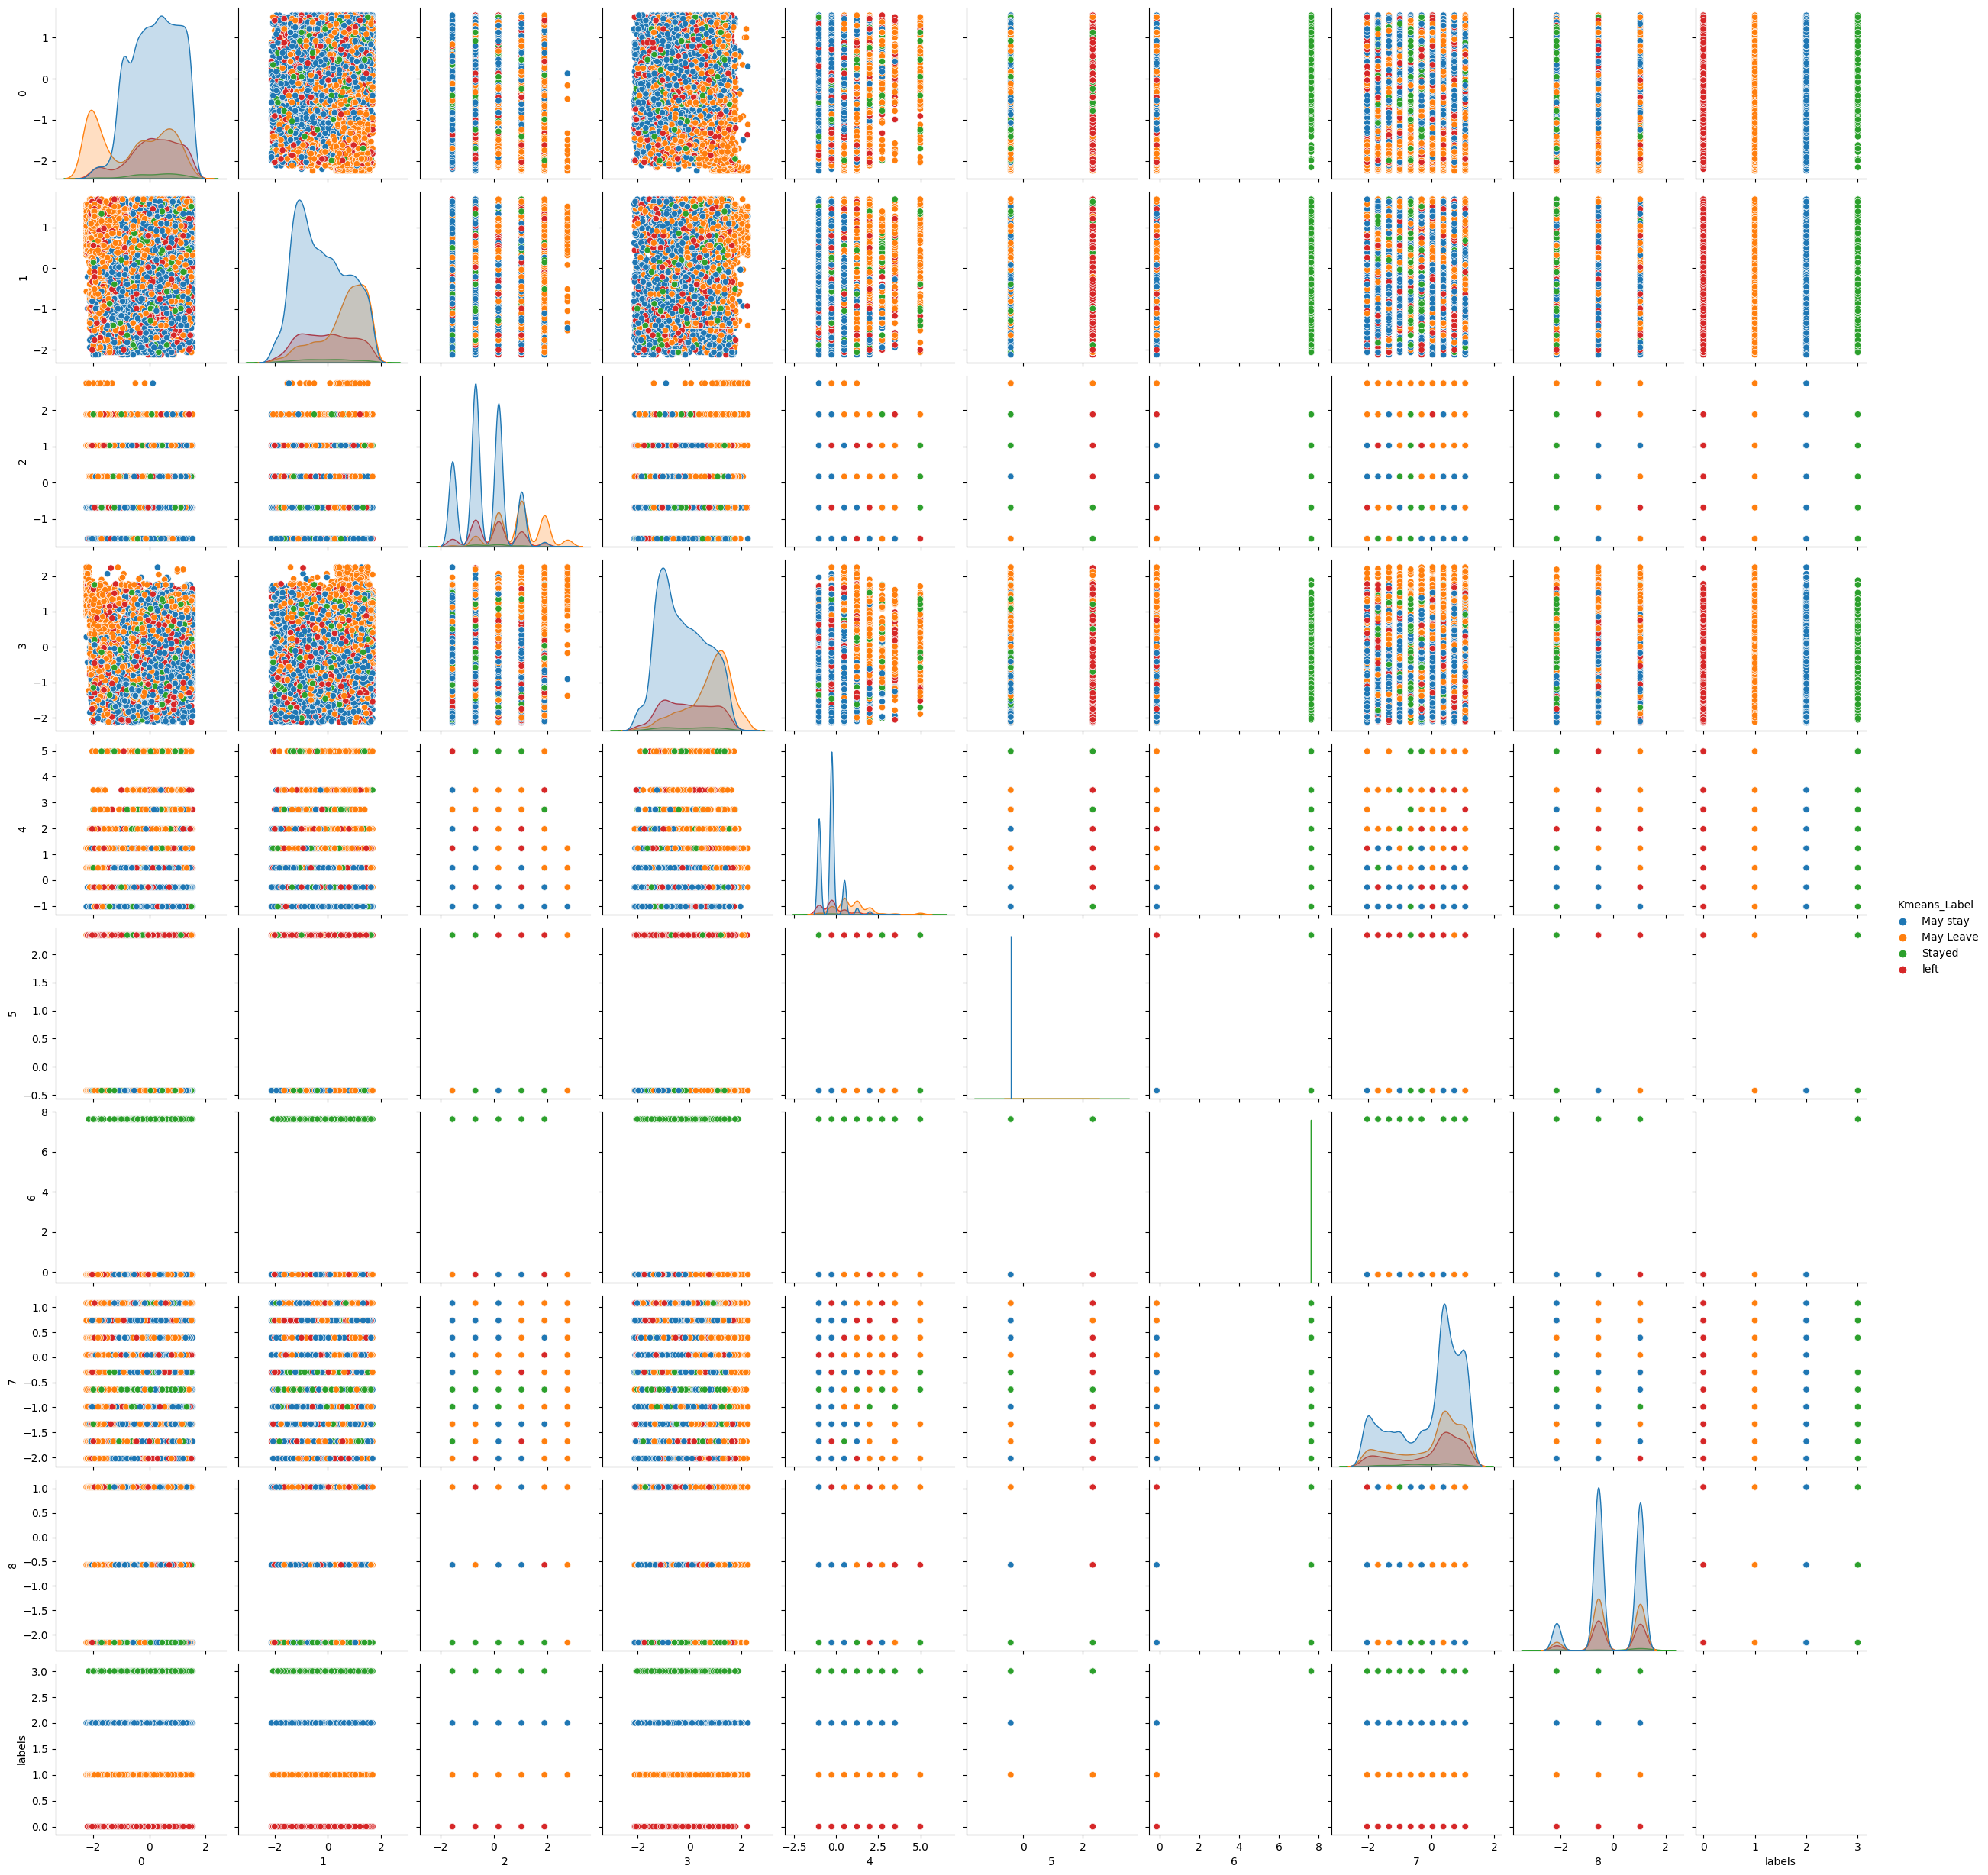

In [49]:
plt.figure(figsize=(15,15))
sns.pairplot(df_cluster_st,hue='Kmeans_Label');

## 5. Predictive Model Building

### Preprocessing

In [50]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years  Departments  salary
0                0.38             0.53               2                   157                   3              0     1                      0            7       1
1                0.80             0.86               5                   262                   6              0     1                      0            7       2
2                0.11             0.88               7                   272                   4              0     1                      0            7       2
3                0.72             0.87               5                   223                   5              0     1                      0            7       1
4                0.37             0.52               2                   159                   3              0     1                      0            7       1

In [51]:
# Separate features and target variable
X = df.drop('left', axis=1)
y = df['left']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [53]:
# scaling to try both scaled and unscaled data

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [54]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9592, 9)
Train target shape   :  (9592,)
Test features shape  :  (2399, 9)
Test target shape    :  (2399,)


In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

# Logistic Regression

Model Building

In [57]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)
logistic_model.fit(X_train_s,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [58]:
y_pred = logistic_model.predict(X_test_s)

Model Evaluation

In [59]:
eval_metric(logistic_model, X_train_s, y_train, X_test_s, y_test)

Test_Set
[[1566  435]
 [  59  339]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2001
           1       0.44      0.85      0.58       398

    accuracy                           0.79      2399
   macro avg       0.70      0.82      0.72      2399
weighted avg       0.88      0.79      0.82      2399


Train_Set
[[6066 1933]
 [ 270 1323]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.55      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.87      0.77      0.80      9592



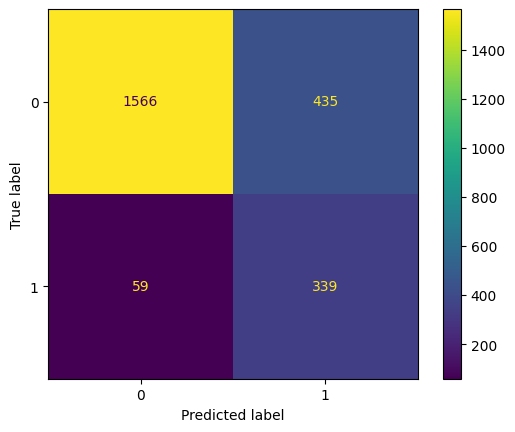

In [60]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_s, y_test);

In [61]:
y_pred = logistic_model.predict(X_test_s)
y_pred_proba= logistic_model.predict_proba(X_test_s)[:,1]

log_AP_ = average_precision_score(y_test, y_pred_proba)
log_rec = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)

# ANN Model without Class wieght

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

Model Building

In [63]:
# Create the model
model = Sequential()

# Add layers to the model
model.add(Dense(8, activation="relu", input_dim=X_train_s.shape[1]))
# model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
history = model.fit(x=X_train_s, y=y_train, validation_split=0.15, batch_size=64, epochs=50)

Epoch 1/50
128/128 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.8117 - val_loss: 0.4091 - val_accuracy: 0.8450
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8320 - val_loss: 0.3313 - val_accuracy: 0.8450
Epoch 3/50
128/128 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8370 - val_loss: 0.2789 - val_accuracy: 0.8638
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8610 - val_loss: 0.2379 - val_accuracy: 0.8992
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9107 - val_loss: 0.2069 - val_accuracy: 0.9368
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 0.9336 - val_loss: 0.1826 - val_accuracy: 0.9521
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9438 - val_loss: 0.1651 - val_accuracy: 0.9548
Epoch 

Model Evaluation

In [66]:
# Predict using the test data
y_pred = (model.predict(X_test_s) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_str}')

75/75 [==============================] - 0s 1ms/step
Accuracy: 0.9712380158399333
Confusion Matrix:
[[1968   33]
 [  36  362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



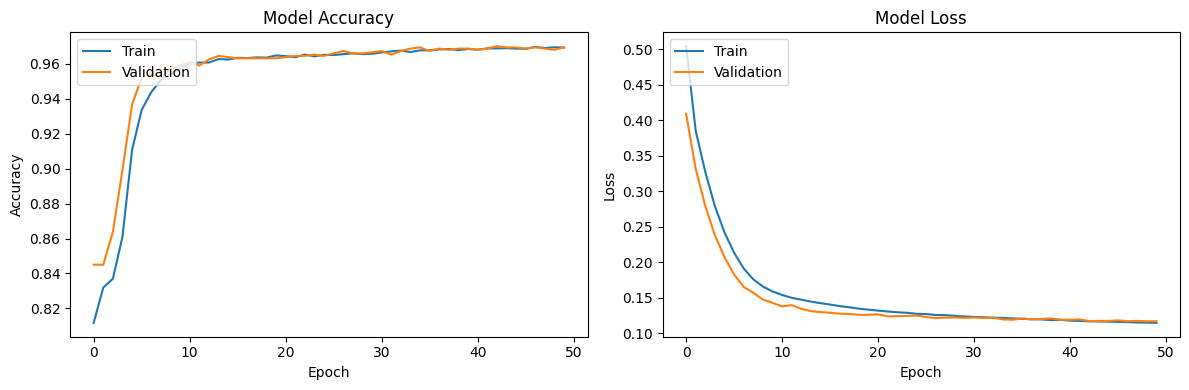

In [67]:
# Plot training history for the model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [68]:
y_pred = model.predict(X_test_s) >= 0.5
y_pred_proba = model.predict(X_test_s)

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

75/75 [==============================] - 0s 1ms/step



# DL Model with Class Wight


In [69]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

Model Building

In [70]:
# Create the model
model_with_weights = Sequential()

# Add layers to the model
model_with_weights.add(Dense(8, activation="relu", input_dim=X_train.shape[1]))
model_with_weights.add(Dense(16, activation="relu"))
model_with_weights.add(Dense(8, activation="relu"))
model_with_weights.add(Dense(1, activation="sigmoid"))


# Compile the model without specifying class weights in compile
model_with_weights.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model_with_weights.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 80        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history1 = model_with_weights.fit(X_train, y_train, epochs=50, validation_split=0.15,
                                  batch_size=64, class_weight={0: class_weights[0], 1: class_weights[1]})

Epoch 1/50
128/128 [==============================] - 2s 6ms/step - loss: 0.7929 - accuracy: 0.4311 - val_loss: 0.7051 - val_accuracy: 0.4670
Epoch 2/50
128/128 [==============================] - 1s 4ms/step - loss: 0.7223 - accuracy: 0.4244 - val_loss: 0.6551 - val_accuracy: 0.6637
Epoch 3/50
128/128 [==============================] - 1s 4ms/step - loss: 0.7063 - accuracy: 0.4335 - val_loss: 0.6229 - val_accuracy: 0.7547
Epoch 4/50
128/128 [==============================] - 0s 4ms/step - loss: 0.7153 - accuracy: 0.4674 - val_loss: 0.6196 - val_accuracy: 0.7735
Epoch 5/50
128/128 [==============================] - 1s 4ms/step - loss: 0.6968 - accuracy: 0.5074 - val_loss: 0.6207 - val_accuracy: 0.7769
Epoch 6/50
128/128 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5243 - val_loss: 0.8600 - val_accuracy: 0.1758
Epoch 7/50
128/128 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.5618 - val_loss: 0.7377 - val_accuracy: 0.3600
Epoch 

Model Evaluation

In [73]:
# Predict using the test data
y_pred = (model_with_weights.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_str}')

75/75 [==============================] - 0s 1ms/step
Accuracy: 0.8453522300958732
Confusion Matrix:
[[1659  342]
 [  29  369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2001
           1       0.52      0.93      0.67       398

    accuracy                           0.85      2399
   macro avg       0.75      0.88      0.78      2399
weighted avg       0.91      0.85      0.86      2399



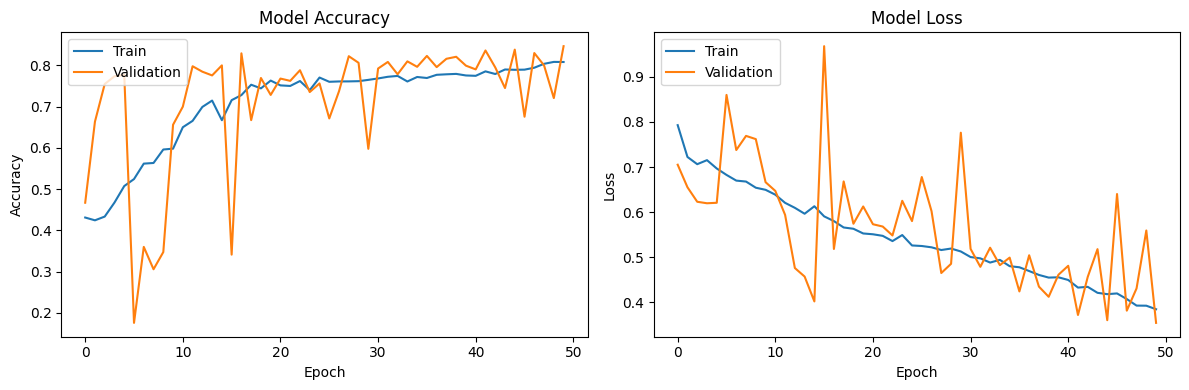

In [74]:
# Plot training history for the model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [75]:
y_pred = model_with_weights.predict(X_test) >= 0.5
y_pred_proba = model_with_weights.predict(X_test)

DLW_AP = average_precision_score(y_test, y_pred_proba)
DLW_f1 = f1_score(y_test, y_pred)
DLW_rec = recall_score(y_test, y_pred)

75/75 [==============================] - 0s 1ms/step


# Gradient Boosting Classifier With SMOTE


Model Building

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
# pip install -U imbalanced-learn


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

In [79]:
y_train.value_counts()

0    7999
1    1593
Name: left, dtype: int64

In [80]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [81]:
y_smote.value_counts()

0    7999
1    7999
Name: left, dtype: int64

In [82]:
gbc = GradientBoostingClassifier()
gbc.fit(X_smote,y_smote)

GradientBoostingClassifier()

Model Evaluation

In [83]:
eval_metric(gbc,X_smote,y_smote,X_test,y_test)

Test_Set
[[1946   55]
 [  24  374]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.87      0.94      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7806  193]
 [ 459 7540]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7999
           1       0.98      0.94      0.96      7999

    accuracy                           0.96     15998
   macro avg       0.96      0.96      0.96     15998
weighted avg       0.96      0.96      0.96     15998



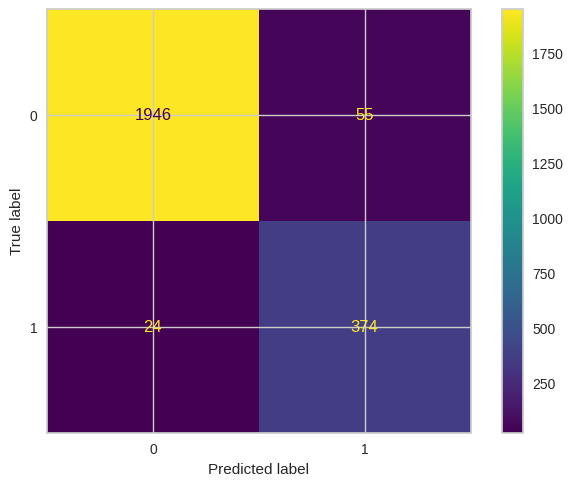

In [84]:
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)

In [85]:
y_pred = gbc.predict(X_test)
y_pred_proba= gbc.predict_proba(X_test)[:,1]


gbc_AP = average_precision_score(y_test, y_pred_proba)
gbc_rec = recall_score(y_test, y_pred)
gbc_f1 = f1_score(y_test,y_pred)

#XGBoost

Model Building

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [88]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[1985   16]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7993    6]
 [  33 1560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



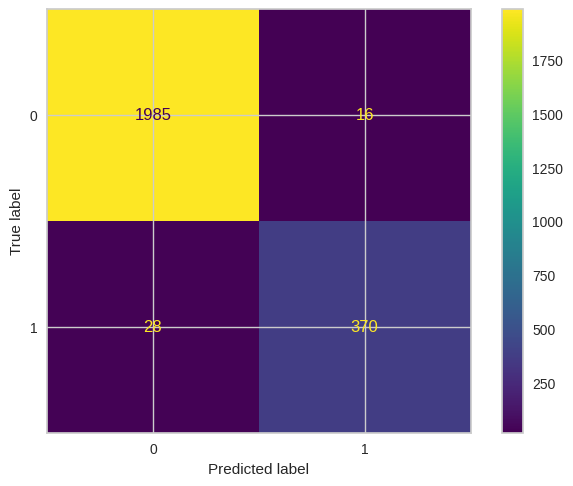

In [89]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [90]:
y_pred = xgb.predict(X_test)
y_pred_proba= xgb.predict_proba(X_test)[:,1]


xgb_AP = average_precision_score(y_test, y_pred_proba)
xgb_rec = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test,y_pred)

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [91]:
logistic_metrics = {'Model': 'Logistic', 'AP': log_AP_, 'F1': log_f1, 'Recall': log_rec}
dl_metrics = {'Model': 'Deep Learning', 'AP': DL_AP, 'F1': DL_f1, 'Recall': DL_rec}
dlw_metrics = {'Model': 'Deep Learning with Weights', 'AP': DLW_AP, 'F1': DLW_f1, 'Recall': DLW_rec}
gbc_metrics = {'Model': 'Gradient Boosting', 'AP': gbc_AP, 'F1': gbc_f1, 'Recall': gbc_rec}
xgb_metrics = {'Model': 'XGBoost', 'AP': xgb_AP, 'F1': xgb_f1, 'Recall': xgb_rec}

comparison_df = pd.DataFrame([logistic_metrics, dl_metrics, dlw_metrics, gbc_metrics, xgb_metrics])

# Display the DataFrame
comparison_df.head()

Model        AP        F1    Recall
0                    Logistic  0.380331  0.578498  0.851759
1               Deep Learning  0.931493  0.912989  0.909548
2  Deep Learning with Weights  0.575430  0.665464  0.927136
3           Gradient Boosting  0.964014  0.904474  0.939698
4                     XGBoost  0.966434  0.943878  0.929648

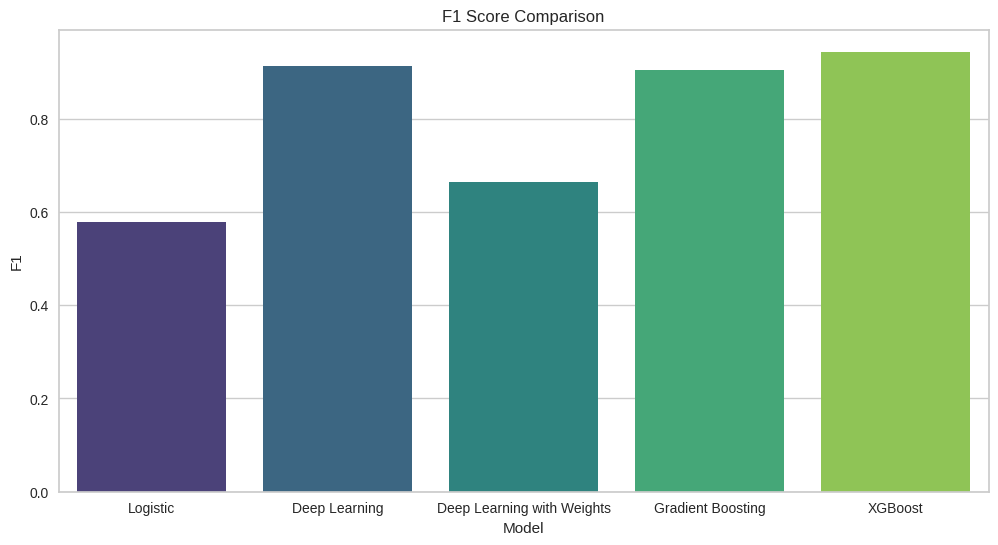

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1', data=comparison_df, palette="viridis")
plt.title('F1 Score Comparison')
plt.show()

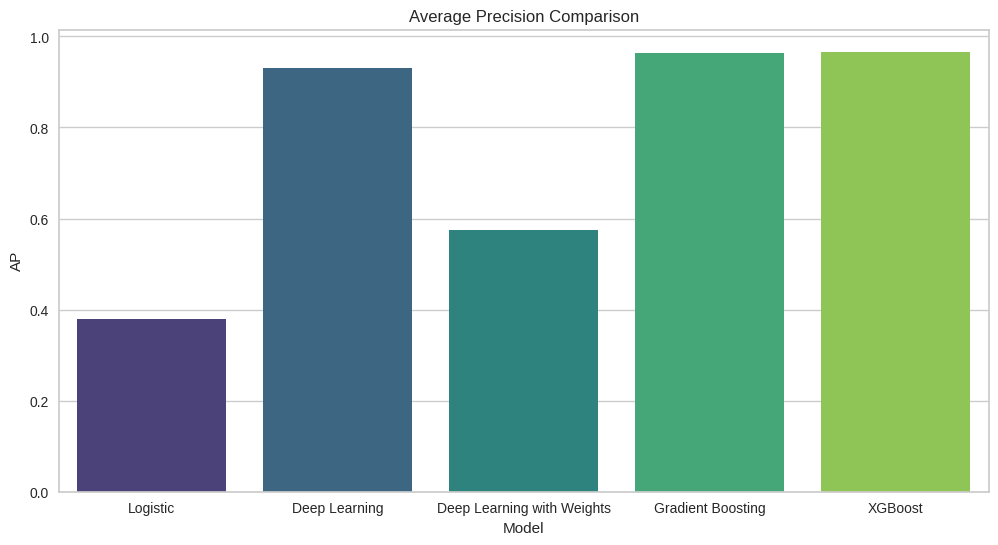

In [93]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AP', data=comparison_df, palette="viridis")
plt.title('Average Precision Comparison')
plt.show()

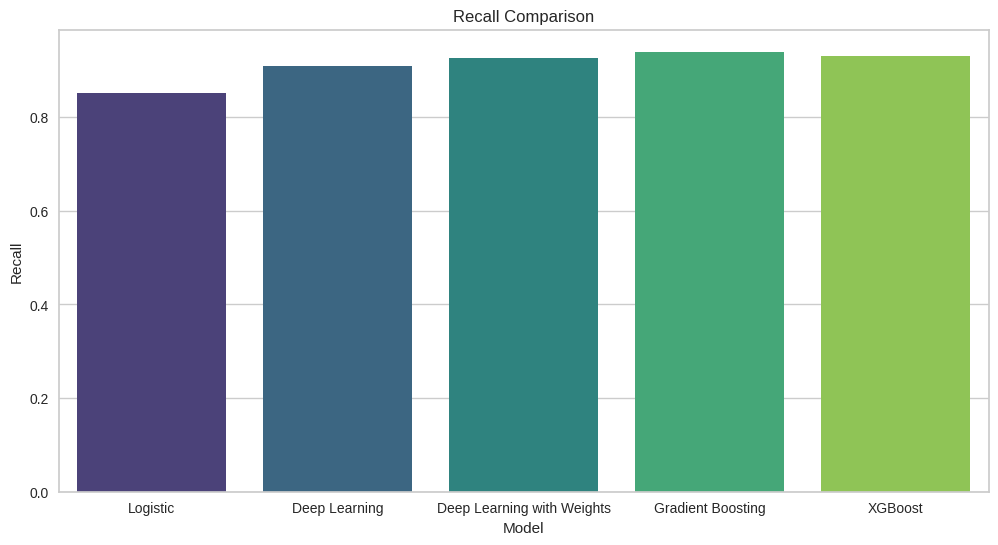

In [94]:
# Create a bar plot for Recall scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Recall', data=comparison_df, palette="viridis")
plt.title('Recall Comparison')
plt.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [95]:
import pickle

In [97]:
# after comparing all the models we decided to use XGBoost
pickle.dump(xgb,open("xgb", "wb"))
pickle.dump(label_encoder, open("encoder", "wb"))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___